In [1]:
# @Author Mirko Matosin
# @Date 14.02.2022
import numpy as np
import pandas as pd
import scipy.io
import math
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy.io import wavfile
from os.path import dirname, join as pjoin
from os import listdir

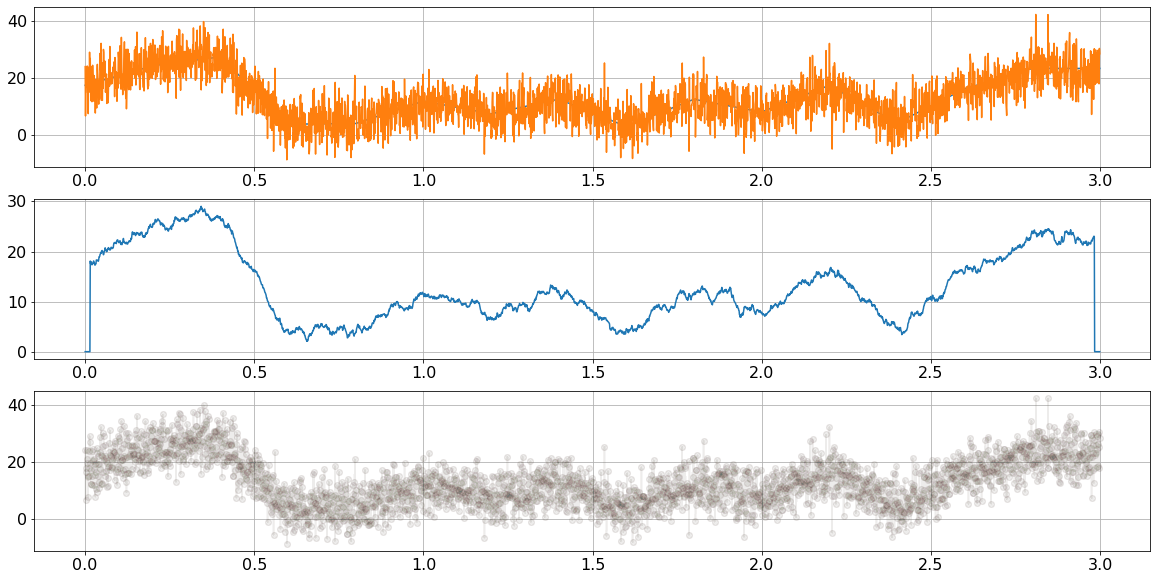

In [2]:
%matplotlib inline
# https://medium.com/analytics-vidhya/signal-data-processing-for-scientific-data-analysis-with-python-part-1-90a90cb7f81

plt.rcParams["font.size"] = 16
plt.rcParams['figure.figsize'] = (20, 10)

# mean series filter

sigRate = 1000 #Hz
time = np.arange(0,3, 1/sigRate)
n = len(time)
p = 15 #poles for random interpolation
ampl = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30)
fig1, axs = plt.subplots(3, 1)
ax1 =  axs[0]
ax2 =  axs[1]
ax3 =  axs[2]
ax1.plot(time, ampl)
noiseamp = 5
noise = noiseamp*np.random.randn(n)
signal = ampl + noise

#ax1.plot(time, ampl)
ax1.plot(time, signal)
ax1.grid()

#initializing
filtSig = np.zeros(n)
k = 15
for i in range(k,n-k-1):
    # each point is the average of k surrounding points
    filtSig[i] = np.mean(signal[i-k:i+k])
ax2.plot(time, filtSig)
ax2.grid('on')

#initializing
filtSig = np.zeros(n)
#filtSig = map(lambda i : np.mean(signal[i-k:i+k], signal))for k in range(10,20):
for k in range(10,20):
    for i in range(k,n-k-1):
        filtSig[i] = np.mean(signal[i-k:i+k])

    ax3.plot(time, signal, marker='o', alpha=0.01)
ax3.grid('on')

25.0


Text(0.5, 1.0, 'Gaussian smoothing filter')

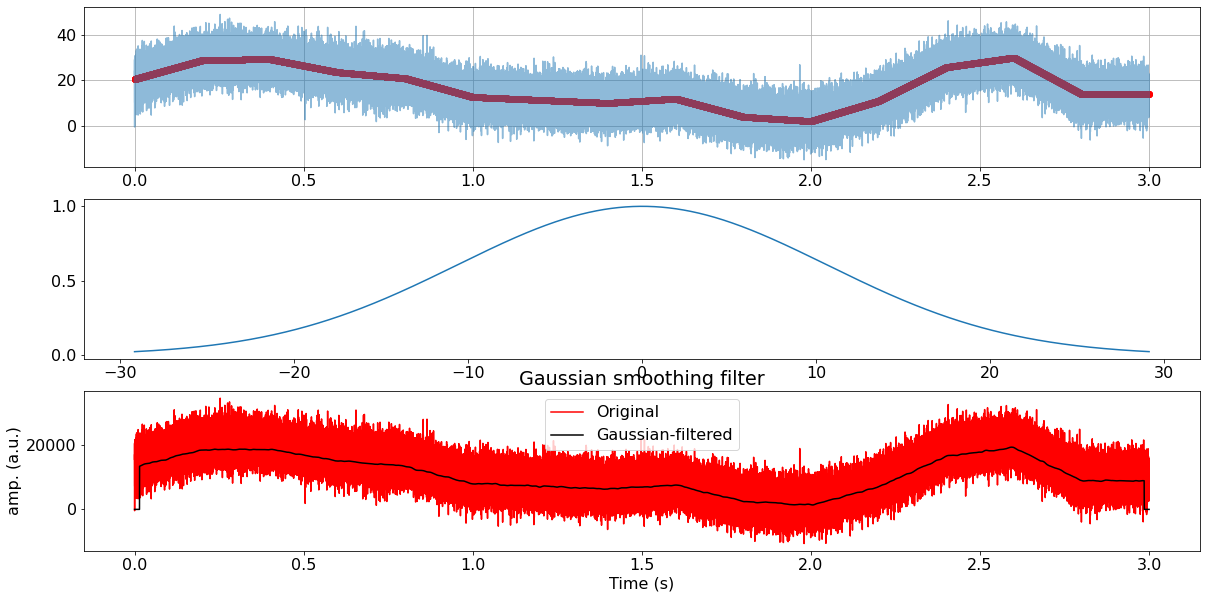

In [3]:
# https://medium.com/analytics-vidhya/signal-processing-time-series-analysis-for-scientific-data-analysis-with-python-part-2-bd263fdf8196

fig1, axs = plt.subplots(3, 1)
ax1 =  axs[0]
ax2 =  axs[1]
ax3 =  axs[2]
sigRate = 48000 #Hz
time = np.arange(0,3, 1/sigRate)
n = len(time)
p = 15 #poles for random interpolation
ampl = np.interp(np.linspace(0,p,n),
                 np.arange(0,p),
                 np.random.rand(p)*30)
noiseamp = 5
noise = noiseamp*np.random.randn(n)
signal = ampl + noise


fwhm = 25 # in ms
k = 700
gauss_time = 2000*np.arange(-k,k)/sigRate# create Gaussian window
gauss_win = np.exp( -(4*np.log(2)*gauss_time**2) / fwhm**2 )


ax1.plot(time, ampl, 'ro-', markersize = 5)
ax1.plot(time, signal, alpha=0.5)
ax1.grid()

ax2.plot(gauss_time,gauss_win)

# Another consideration here is to calculate the empirical FWHM. As the gauss_time depends on sampling rate, the empirical FWHM is never exactly same as our assigned value. Notice that even though we have specified FWHM to be 25 the empirical number turned out to be 26 in my case.
pstPeakHalf = k + np.argmin( (gauss_win[k:]-.5)**2 )
prePeakHalf = np.argmin( (gauss_win-.5)**2 )
empFWHM = gauss_time[pstPeakHalf] - gauss_time[prePeakHalf]
print(empFWHM)


# initialize filtered signal vector
filtSig_Gauss = np.zeros(n)# # implement the running mean filter
for i in range(k+1,n-k-1):
    # each point is the weighted average of k surrounding points
    filtSig_Gauss[i] = np.sum( signal[i-k:i+k]*gauss_win )

ax3.plot(time,k*signal,'r',label='Original')
ax3.plot(time,filtSig_Gauss,'k',label='Gaussian-filtered')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('amp. (a.u.)')
#ax3.set_xlim(left=0.02, right=2.98)
ax3.legend()
ax3.set_title('Gaussian smoothing filter')

In [ ]:
import scipy.signal as signal





